In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [56]:
# Loading dataset
data = pd.read_csv("HR_comma.csv")
# Having a look at dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [57]:
# Shape of the Dataset
data.shape

(14999, 10)

In [58]:
# Cheking null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [59]:
data["left"].value_counts()
# 0 -- People not left the Company
# 1 -- People left the Company

0    11428
1     3571
Name: left, dtype: int64

In [60]:
data["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [61]:
left_department = data[data["left"]==1]

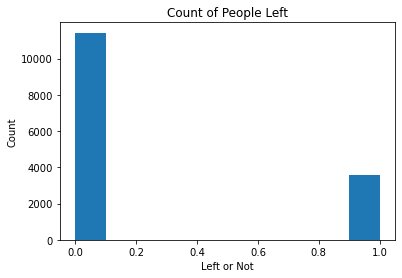

In [62]:
plt.hist(data.left)
plt.xlabel("Left or Not")
plt.ylabel("Count")
plt.title("Count of People Left")
plt.show()

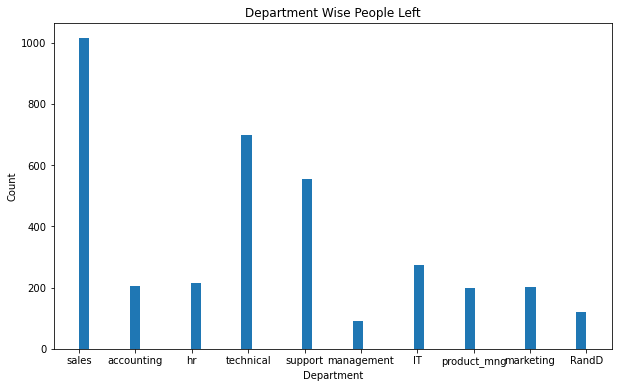

In [63]:
plt.figure(figsize = (10,6))
plt.hist(left_department["Department"], bins = 50)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Wise People Left")
plt.show()
#left_department

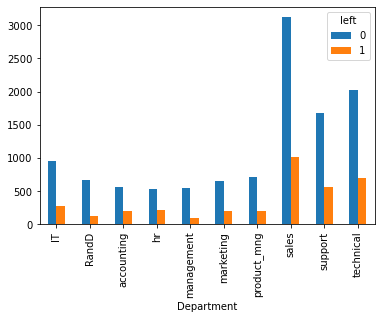

In [64]:
# Employee Retention Rate Department Wise
pd.crosstab(data.Department, data.left).plot(kind = "bar")
plt.show()

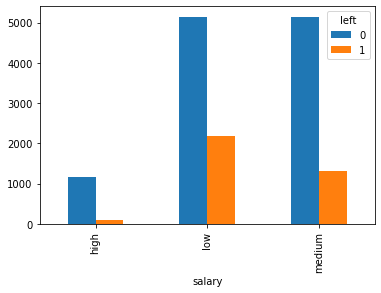

In [65]:
# Impact of salary on retention Rate
pd.crosstab(data.salary, data.left).plot(kind="bar")
plt.show()

In [66]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [37]:
# last_evaluation should not have that much impact on the retention rate, so not considering this columns.

In [67]:
df = data.drop(["last_evaluation", "Department"], axis=1)
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,2,157,3,0,1,0,low
1,0.80,5,262,6,0,1,0,medium
2,0.11,7,272,4,0,1,0,medium
3,0.72,5,223,5,0,1,0,low
4,0.37,2,159,3,0,1,0,low


In [68]:
# Creating Dummy Variables for salary as it is a categorical column also droping first to avoid dummy variable trap
get_dummies = pd.get_dummies(df.salary, prefix = "Salary", drop_first = True)

In [69]:
# Merging into single dataframe
df_new = pd.concat([df, get_dummies], axis= 1)
df_new.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Salary_low,Salary_medium
0,0.38,2,157,3,0,1,0,low,1,0
1,0.80,5,262,6,0,1,0,medium,0,1
2,0.11,7,272,4,0,1,0,medium,0,1
3,0.72,5,223,5,0,1,0,low,1,0
4,0.37,2,159,3,0,1,0,low,1,0


In [70]:
df_new.drop("salary",axis =1, inplace = True)
df_new.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary_low,Salary_medium
0,0.38,2,157,3,0,1,0,1,0
1,0.80,5,262,6,0,1,0,0,1
2,0.11,7,272,4,0,1,0,0,1
3,0.72,5,223,5,0,1,0,1,0
4,0.37,2,159,3,0,1,0,1,0


In [73]:
X = df_new.drop("left", axis=1)
y = df_new["left"]

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [50]:
from sklearn.linear_model import LogisticRegression

In [79]:
model_lr = LogisticRegression(max_iter = 1000)

In [80]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
model_lr.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
model_lr.score(X_test, y_test)*100

80.04444444444444